### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [4]:
library(tidyverse)
library(lubridate)

options (warn = -1)

ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [5]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [6]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [7]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Data Preparation
Prepare data for anlysis

In [8]:
# and empty Gender,  Zero Birth Year colums and City colums where necessary
wash2<-wash %>% mutate(Gender = '',Birth.Year=0,City="Washington")
#head(wash2)
#nrow(wash2)

ny2<-ny %>% mutate(City = "New York")
#head(ny2)
#nrow(ny2)

chi2<-chi %>% mutate(City = "Chicago")
#head(chi2)
#nrow(chi2)

#Consolidate all cities into a single data table
bike<-bind_rows(wash2,ny2,chi2)
#head(bike)
#nrow(bike)

#add supplimentary columns for analysis purposes
bike<-bike %>% 
mutate(
    Gender=(ifelse(Gender =="","Unspecified",Gender))
    ,User.Type=(ifelse(User.Type =="","Other",as.character(User.Type)))
    ,Starthr = as.factor(as.numeric(substr(Start.Time,12,13)))
    ,Endhr = as.factor(as.numeric(substr(End.Time,12,13)))
    ,Tripmin = Trip.Duration/60
    ,Startdate = as_date(Start.Time)
    ,Enddate = as_date(End.Time)
    ,Startweekday = as.factor(wday(as_date(Start.Time)))
    ,Endweekday = as.factor(wday(as_date(End.Time)))
    ,Startwdname = weekdays(as_date(Start.Time))
    ,Endwdname = weekdays(as_date(End.Time))
) %>% 
filter(Trip.Duration!='NA')


summary(bike)



       X            Start.Time          End.Time         Trip.Duration    
 Min.   :      7   Length:152449      Length:152449      Min.   :     60  
 1st Qu.: 589315   Class :character   Class :character   1st Qu.:    392  
 Median :1184899   Mode  :character   Mode  :character   Median :    667  
 Mean   :1781608                                         Mean   :   1098  
 3rd Qu.:2085919                                         3rd Qu.:   1159  
 Max.   :6816152                                         Max.   :1088634  
                                                                          
 Start.Station      End.Station         User.Type            Gender         
 Length:152449      Length:152449      Length:152449      Length:152449     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

### Question 1


**What is the distribution of bike rentals by time of day and the day of the week?**

Create datasets that aggregate the number of rentals by Factors explored

In [9]:
#Grouping  by hour of day
paste("Rentals by time of day")
bkhr<-bike %>% 
group_by(Starthr) %>% 
summarise(rentals = n(), Ave_time = mean(Tripmin))
head(bkhr)

#Grouping  by day of week (Sunday = 1)
paste("Rentals by day of week")
bkwd<-bike %>% 
group_by(Startweekday) %>% 
summarise(rentals = n(), Ave_time = mean(Tripmin))
bkwd

# Grouping by day and hour
paste("Rentals by day and time")
bkhrday<-bike %>% 
group_by(Startweekday,Starthr) %>% 
summarise(rentals = n(), Ave_time = mean(Tripmin))
head(bkhrday)

[1] "Rentals by time of day"

Starthr,rentals,Ave_time
0,718,15.76206
1,3757,26.49110
2,3591,31.57364
3,3731,24.86009
4,4642,22.81376
5,7120,18.31687


[1] "Rentals by day of week"

Startweekday,rentals,Ave_time
1,19273,24.82956
2,20593,16.44085
3,22478,16.62950
4,25080,15.14303
5,23187,15.61697
6,22379,17.40958
7,19459,24.08205


[1] "Rentals by day and time"

Startweekday,Starthr,rentals,Ave_time
1,0,155,23.59746
1,1,816,28.70938
1,2,780,31.82286
1,3,740,27.86303
1,4,716,33.26110
1,5,640,26.65572


****Generate charts showing hourly and daily distributions of rentals****

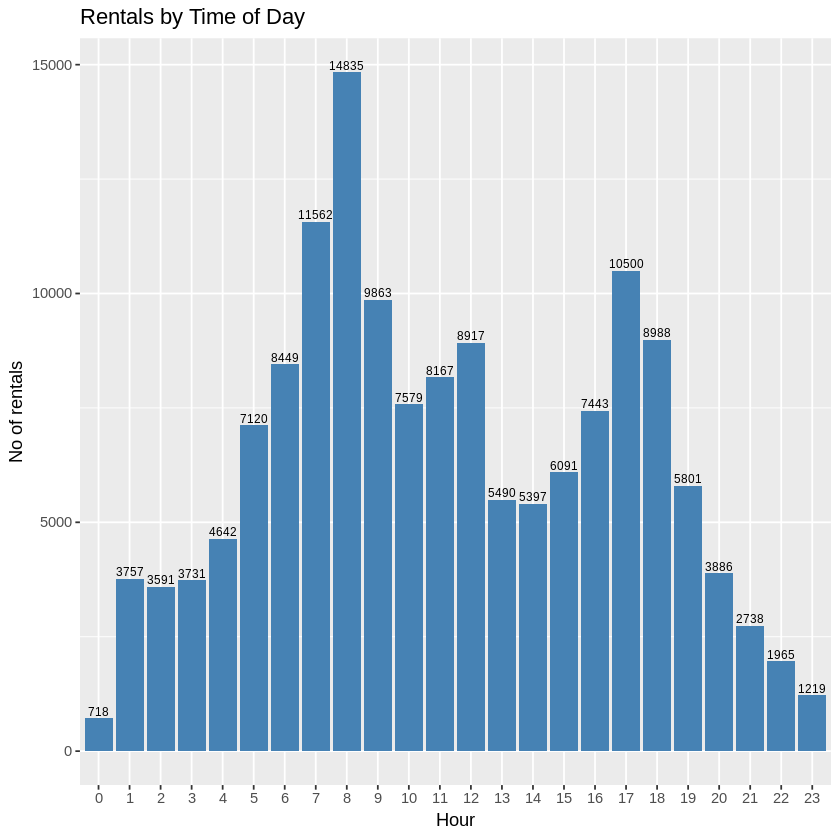

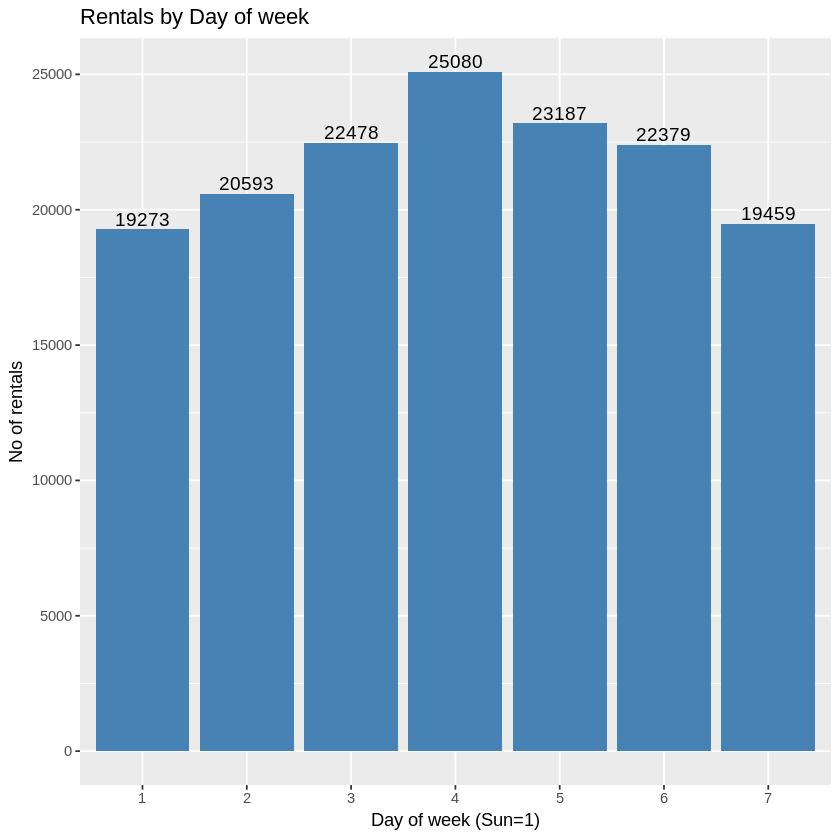

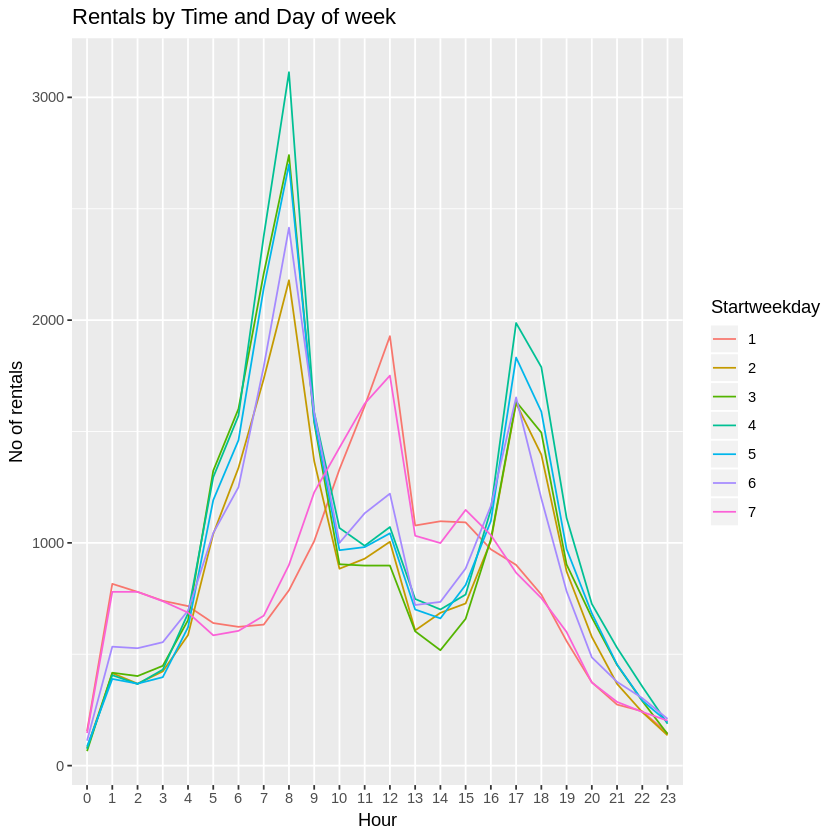

In [21]:
# Distribution by hour
ggplot(data=bkhr,aes(x=Starthr,y=rentals,group=1))+
geom_bar(stat="identity",fill="steelblue")+
geom_text(aes(label=rentals), vjust=-0.3, size=2.5)+
labs(title="Rentals by Time of Day", 
         x="Hour", y = "No of rentals")

#Distribution by day of week
ggplot(data=bkwd,aes(x=Startweekday,y=rentals,group=1))+
geom_bar(stat="identity",fill="steelblue")+
geom_text(aes(label=rentals), vjust=-0.3, size=4)+
labs(title="Rentals by Day of week", 
         x="Day of week (Sun=1)", y = "No of rentals")


# Distribution by hour and day
ggplot(data=bkhrday,aes(x=Starthr,y=rentals,group = Startweekday,color= Startweekday))+
geom_line()+
theme(legend.title =NULL)+
labs(title="Rentals by Time and Day of week", 
         x="Hour", y = "No of rentals")


<b>The results from the charts suggest:
1. 8am has the highest number of rentals followed by 5pm, which suggests that commuting to work and home is the most common usage of rental bikes. 
2. On weekends there are fewer rentals which peak at 12pm, suggesting that people rental bikes for leisurely purposes.</b>


### Question 2

**How do ride statistics vary across city, gender, and user types?**

Below is a series of charts that display the distribution of<b> trip duration</b> by <i>Gender, City </i>and <i>User Type</i>

In [11]:
#Grouping  by gender
bkgen<-bike %>% 
select(City, Gender,User.Type,Tripmin)

paste("Summary")
summary(bkgen$Tripmin)

#90th percentile value
Tr90<-quantile(bkgen$Tripmin,0.90)

#Remove top 10% of extreme trip duration values
bkgen<-bkgen %>% 
filter(Tripmin<=Tr90)

#Revised summary
paste("Revised Summary with extreme values removed")
summary(bkgen$Tripmin)
#head(bkgen)

[1] "Summary"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.000     6.533    11.117    18.308    19.312 18143.900 

[1] "Revised Summary with extreme values removed"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.16   10.05   11.73   16.17   30.33 

City,Gender,User.Type,Tripmin
Washington,Unspecified,Subscriber,8.151100
Washington,Unspecified,Subscriber,6.709150
Washington,Unspecified,Subscriber,10.620850
Washington,Unspecified,Subscriber,25.823783
Washington,Unspecified,Subscriber,6.633333
Washington,Unspecified,Subscriber,18.423817


[1] "Summary by Gender"

bkgen$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.433  10.133  11.712  15.867  30.333 
------------------------------------------------------------ 
bkgen$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.533   8.783  10.481  13.983  30.333 
------------------------------------------------------------ 
bkgen$Gender: Unspecified
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.005   6.497  10.765  12.337  17.150  30.333 

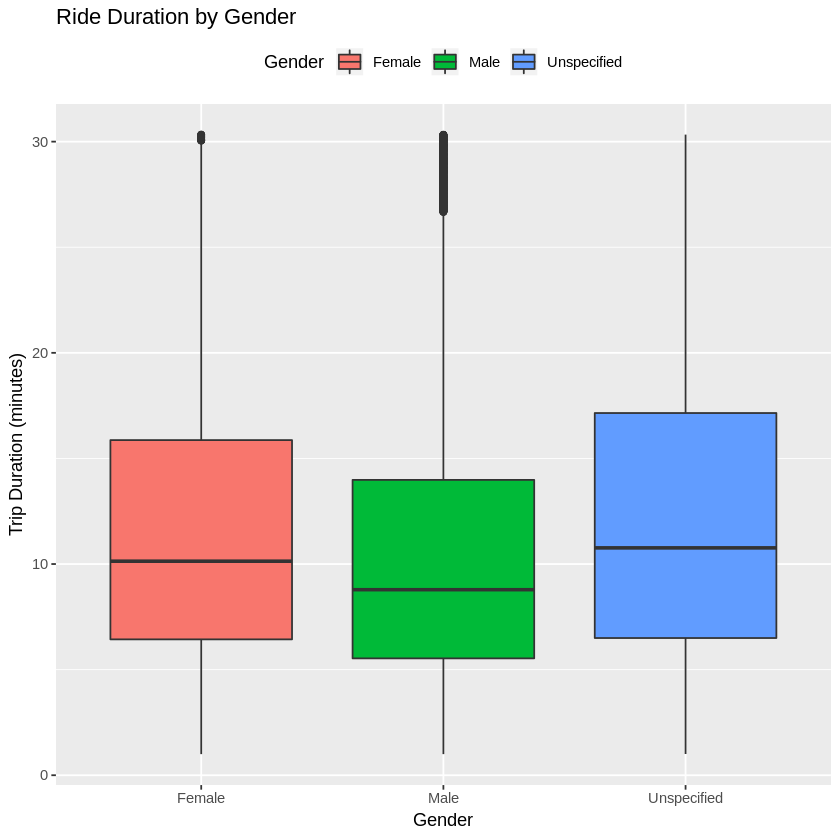

In [12]:
# Distribution by gender
ggplot(data=bkgen,aes(x=Gender,y=Tripmin,fill = Gender))+
geom_boxplot()+
labs(title="Ride Duration by Gender", 
          y = "Trip Duration (minutes)")+
theme(legend.position="top")

paste("Summary by Gender")
by(bkgen$Tripmin,bkgen$Gender,summary)


[1] "Summary by City"

bkgen$City: Chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.283  10.400  11.893  16.550  30.333 
------------------------------------------------------------ 
bkgen$City: New York
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.017   5.883   9.517  11.305  15.467  30.333 
------------------------------------------------------------ 
bkgen$City: Washington
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.005   6.347  10.400  11.990  16.523  30.332 

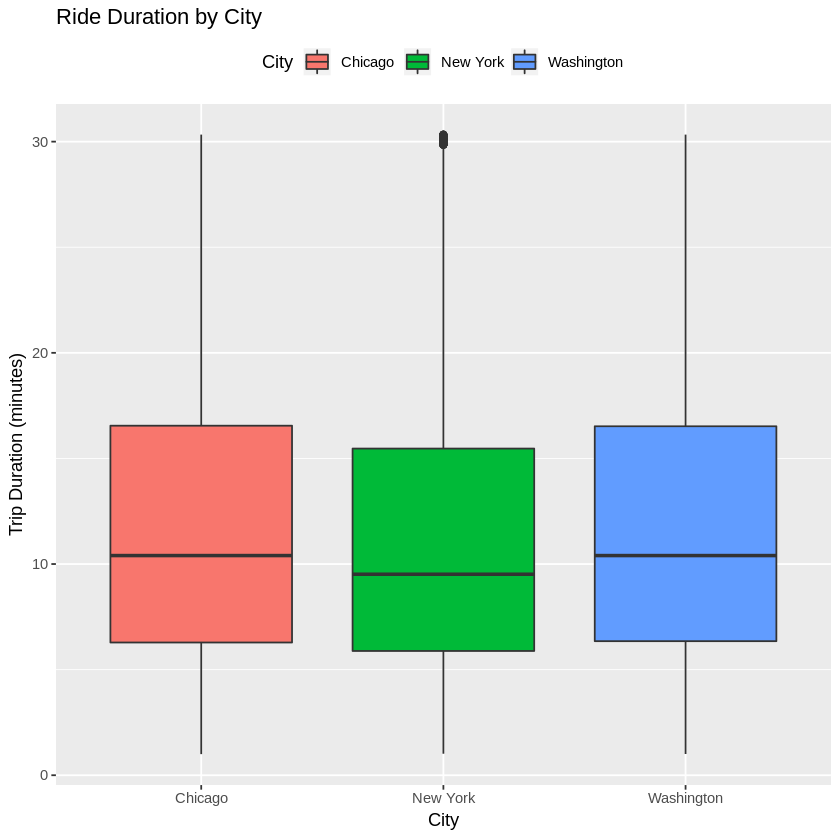

In [13]:
# Distribution by gender
ggplot(data=bkgen,aes(x=City,y=Tripmin,fill = City))+
geom_boxplot()+
theme(legend.position="top")+
labs(title="Ride Duration by City", 
          y = "Trip Duration (minutes)")

paste("Summary by City")
by(bkgen$Tripmin,bkgen$City,summary)

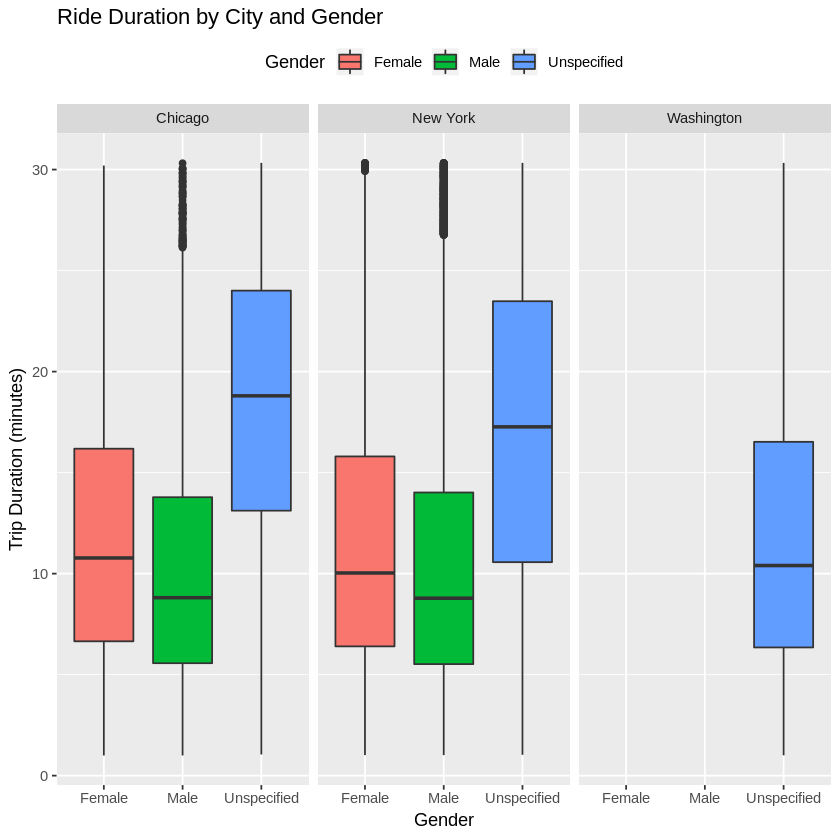

In [14]:
# Distribution by gender
ggplot(data=bkgen,aes(x=Gender,y=Tripmin,fill=Gender))+
geom_boxplot()+
labs(title="Ride Duration by City and Gender", 
          y = "Trip Duration (minutes)")+
facet_wrap(~City)+
theme(legend.position="top")

[1] "Summary by User Type"

bkgen$User.Type: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.022  11.921  17.967  17.675  23.750  30.333 
------------------------------------------------------------ 
bkgen$User.Type: Other
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.35   11.25   16.28   16.99   23.10   30.27 
------------------------------------------------------------ 
bkgen$User.Type: Subscriber
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.751   9.154  10.709  14.350  30.333 

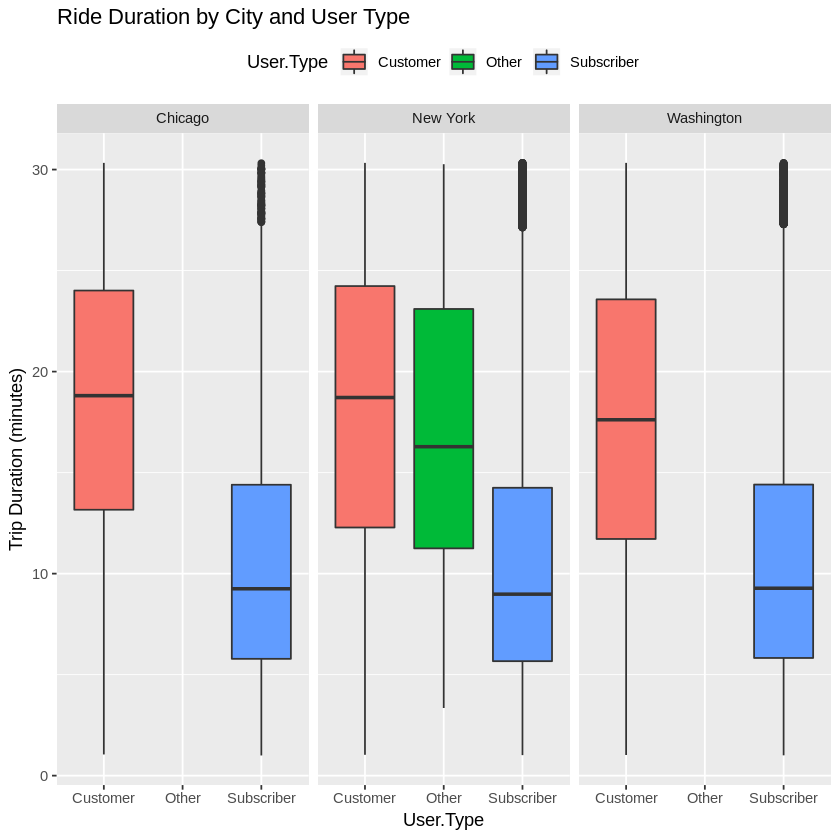

In [15]:
# Distribution by User Type
ggplot(data=bkgen,aes(x=User.Type,y=Tripmin,fill=User.Type))+
geom_boxplot()+
labs(title="Ride Duration by City and User Type", 
          y = "Trip Duration (minutes)")+
facet_wrap(~City)+
theme(legend.position="top")

paste("Summary by User Type")
by(bkgen$Tripmin,bkgen$User.Type,summary)



In [16]:
paste('summary of User Types')
bike %>% 
group_by(User.Type) %>% 
summarise(Ave_Dur=mean(Tripmin),Rentals=n())

[1] "summary of User Types"

User.Type,Ave_Dur,Rentals
Customer,41.91120,30754
Other,30.80700,119
Subscriber,12.32497,121576


<b>An assessment of the data suggests the following:
1. Female renters take slightly longer trips than male renters. Renters of an unspecified gender take the longest trips. This trend occurs across all three cities.
2. Riders in New York take the shortest trips on average. Trip duration distribution varies marginally across the three cities.
3. The CUSTOMER user type rents less often than SUBSCRIBERS, but takes longer trips. This suggests that CUSTOMERS may be more likely to rent bikes for recreational purpusoses.
    </b>


### Question 3

**What are the moset common routes across all three cities?**

Create data sets subdividing the count of rentals by start and end stations

In [17]:
bkst<-bike %>% 
group_by (Start.Station, End.Station, City) %>% 
summarise(trips=n(),Duration = mean(Tripmin)) 

#Separate data by City
bkny<-bkst %>% 
filter(City=="New York")%>% 
filter(trips>=15)%>% 
arrange(desc(trips)) 
#head(bkny)

bkchi<-bkst %>% 
filter(City=="Chicago")%>% 
filter(trips>=10)%>% 
arrange(desc(trips))
#head(bkchi)

bkwas<-bkst %>% 
filter(City=="Washington")%>% 
filter(trips>=50)%>% 
arrange(desc(trips))
#head(bkwas)


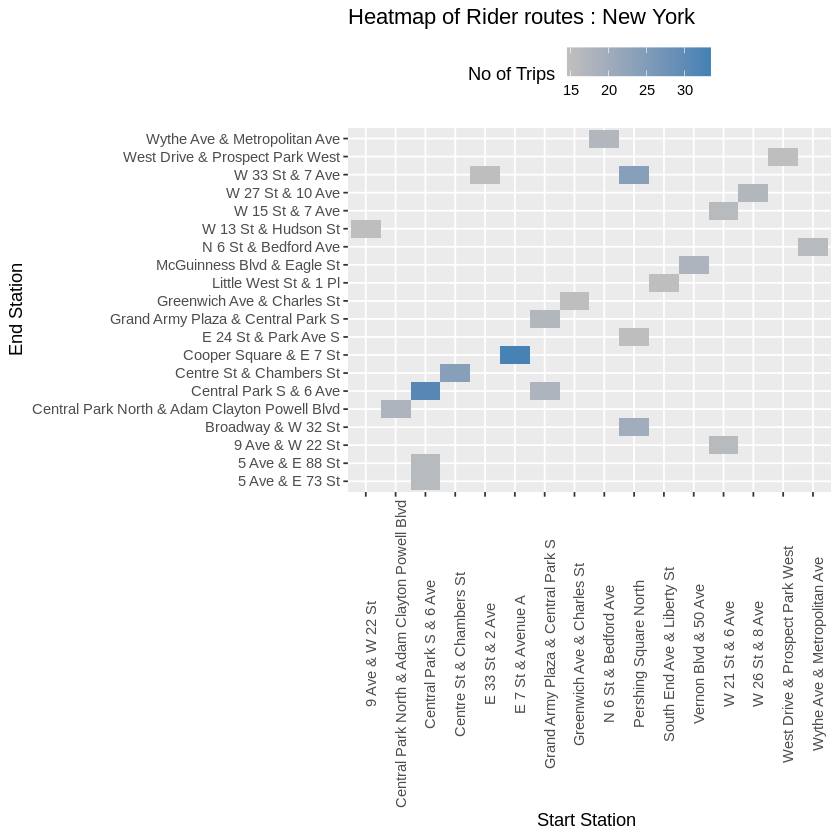

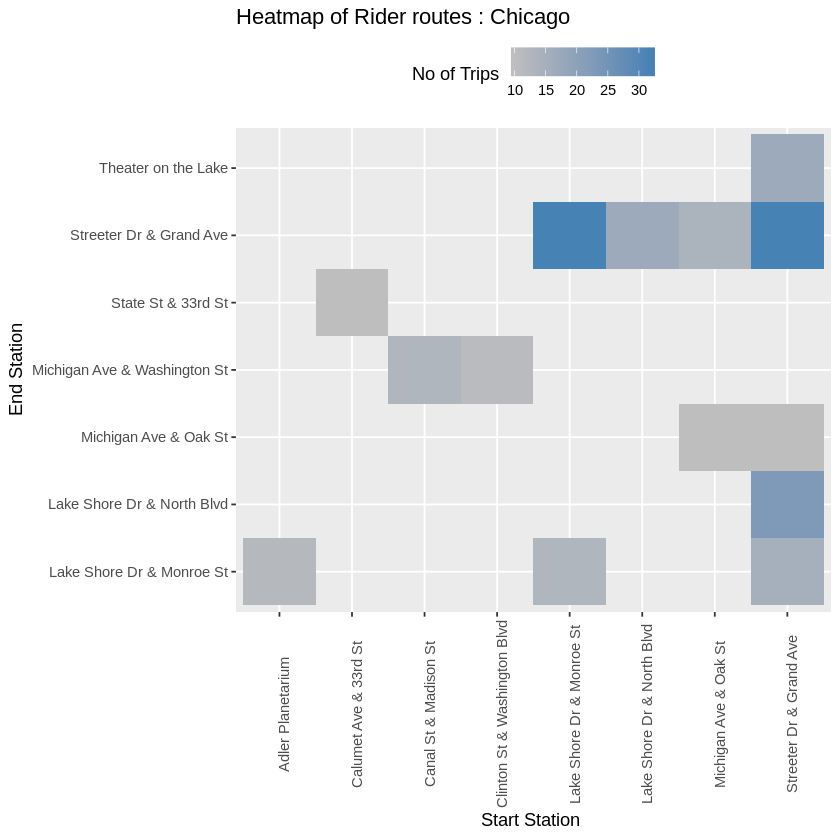

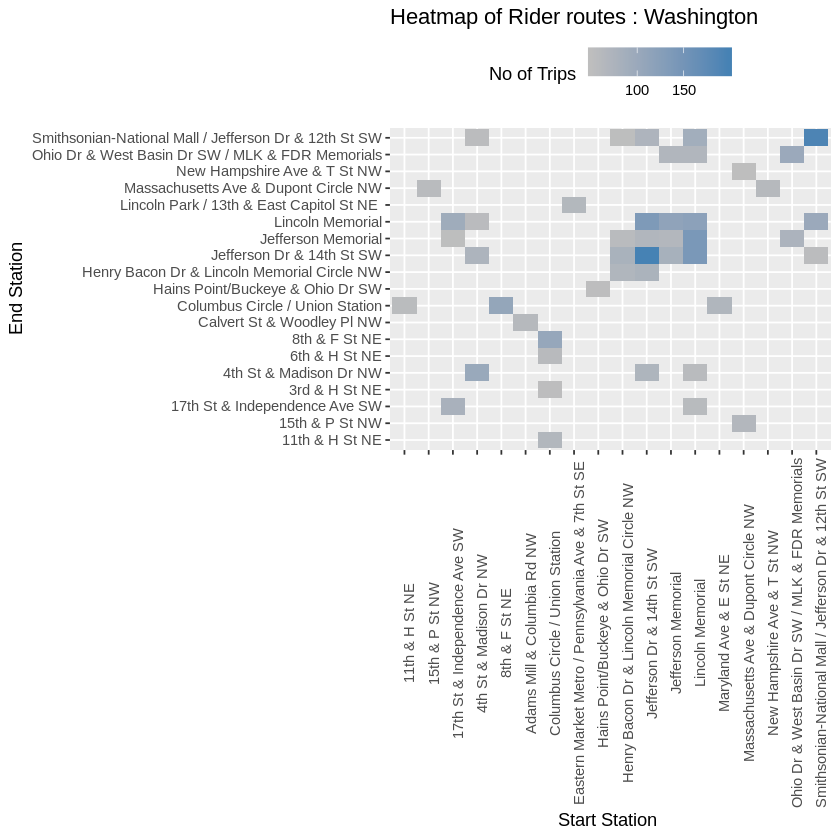

In [18]:
# Tile Plot of most common routes
ggplot(data=bkny,aes(x=Start.Station,y=End.Station,fill=trips))+
geom_tile()+
labs(title="Heatmap of Rider routes : New York", 
           x="Start Station ", y = "End Station")+
theme(legend.position="top",axis.text.x = element_text(angle = 90))+  
scale_fill_gradient(name = "No of Trips",low = "grey", high = "steelblue")


ggplot(data=bkchi,aes(x=Start.Station,y=End.Station,fill=trips))+
geom_tile()+
labs(title="Heatmap of Rider routes : Chicago", 
          x="Start Station ", y = "End Station")+
theme(legend.position="top",axis.text.x = element_text(angle = 90))+  
scale_fill_gradient(name = "No of Trips",low = "grey", high = "steelblue")


ggplot(data=bkwas,aes(x=Start.Station,y=End.Station,fill=trips))+
geom_tile()+
labs(title="Heatmap of Rider routes : Washington", 
         x="Start Station ", y = "End Station")+
theme(legend.position="top",axis.text.x = element_text(angle = 90))+  
scale_fill_gradient(name = "No of Trips",low = "grey", high = "steelblue")




In [19]:
#Build a summary of top routes
bkny3<-bkst %>% 
filter(City=="New York")%>% 
arrange(desc(trips)) %>% 
select(City, Start.Station, End.Station,trips) %>% 
head(n=3L)


bkchi3<-bkst %>% 
filter(City=="Chicago")%>% 
filter(trips>=10)%>% 
arrange(desc(trips)) %>% 
select(City, Start.Station, End.Station,trips) %>% 
head(n=3L)


bkwas3<-bkst %>% 
filter(City=="Washington")%>% 
filter(trips>=50)%>% 
arrange(desc(trips)) %>% 
select(City, Start.Station, End.Station,trips) %>% 
head(n=3L)


rbind(bkny3,bkchi3,bkwas3)

City,Start.Station,End.Station,trips
New York,E 7 St & Avenue A,Cooper Square & E 7 St,33
New York,Central Park S & 6 Ave,Central Park S & 6 Ave,31
New York,Centre St & Chambers St,Centre St & Chambers St,24
Chicago,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,32
Chicago,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,32
Chicago,Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,23
Washington,Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,198
Washington,Smithsonian-National Mall / Jefferson Dr & 12th St SW,Smithsonian-National Mall / Jefferson Dr & 12th St SW,192
Washington,Lincoln Memorial,Jefferson Dr & 14th St SW,143


<b> The results of the heatmap charts and the summary above suggest that the most common routes from start to end are:
        1. New York: E 7 St & Avenue A - Cooper Square & E 7 St       
        2. Chicago: Lake Shore Dr & Monroe St - Streeter Dr & Grand Ave
        3. Washington: Jefferson Dr & 14th St SW - Jefferson Dr & 14th St SW 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [20]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')